In [27]:
import pandas as pd
import numpy as np
from dotenv import load_dotenv
import os


load_dotenv()
ow_key = os.getenv('ow_key')

In [28]:
df_ip = pd.read_csv('data/inverter_plants.csv')

# Fix NaN plant_address values to 'Gazipur' for consistency
df_ip['plant_address'] = df_ip['plant_address'].fillna('Gazipur')

df_ip['plant_number'] = df_ip.index + 1

df = df_ip[['plant_id', 'plant_name', 'plant_address', 'plant_capacity', 'plant_number']]

df

,plant_id,plant_name,plant_address,plant_capacity,plant_number
0,15848107,DGL (GGI),Gazipur,1280.40,1
1,1535729,SOLshare LM Tower,Dhaka,4.25,2
2,1535728,BHC,Dhaka,15.66,3
3,11811249,ACCL (GGI),Gazipur,285.12,4
4,11605154,NAL (GGI),Gazipur,227.04,5
5,12018942,ACML (GGI),Gazipur,525.36,6
6,11701955,CAL (GGI),Gazipur,522.72,7
7,11838318,HKL (GGI),Gazipur,269.28,8
8,1535726,Unilever Sales Depot Bogura,Bogura,39.60,9
9,9977156,KCL (SOLshare),Narayangang,249.20,10


In [29]:
df_hour = pd.read_csv('data/inverter_hourly_generation_logs.csv')
df_5m = pd.read_csv('data/inverter_five_minutes_generation_logs.csv')

df_hour = df_hour.merge(df, on='plant_id', how='left')
df_5m = df_5m.merge(df, on='plant_id', how='left')

plant_daylist = df_hour['plant_name'].unique().tolist()
adress_daylist = df_hour['plant_address'].unique().tolist()

print('df_hour'), df_hour.shape, df_hour['generation_date'].min(), df_hour['generation_date'].max(), adress_daylist

df_hour


(None,
 (550721, 7),
 '2023-01-23 09:00:00 UTC',
 '2025-02-04 15:55:00 UTC',
 ['Bogura', 'Narayangang', 'Rajshahi', 'Gazipur', nan])

In [31]:
print('df_5m'), df_5m.shape, df_5m['generation_date'].min(), df_5m['generation_date'].max(), adress_daylist

df_5m


(None,
 (849773, 7),
 '2023-01-23 09:00:00 UTC',
 '2025-10-22 15:55:00 UTC',
 ['Bogura', 'Narayangang', 'Rajshahi', 'Gazipur', nan])

In [33]:
df_hour

,plant_id,generation_date,generation_amount,plant_name,plant_address,plant_capacity,plant_number
0,1535726,2024-01-21 11:00:00 UTC,0.51,Unilever Sales Depot Bogura,Bogura,39.60,9.0
1,1535726,2024-01-22 08:00:00 UTC,12.27,Unilever Sales Depot Bogura,Bogura,39.60,9.0
2,1535726,2024-01-22 06:00:00 UTC,9.10,Unilever Sales Depot Bogura,Bogura,39.60,9.0
3,1535726,2024-01-22 07:00:00 UTC,12.47,Unilever Sales Depot Bogura,Bogura,39.60,9.0
4,1535726,2024-01-22 04:00:00 UTC,4.77,Unilever Sales Depot Bogura,Bogura,39.60,9.0
...,...,...,...,...,...,...,...
550716,12018942,2024-08-01 15:35:00 UTC,0.00,ACML (GGI),Gazipur,525.36,6.0
550717,12018942,2024-08-01 15:40:00 UTC,0.00,ACML (GGI),Gazipur,525.36,6.0
550718,12018942,2024-08-01 15:45:00 UTC,0.00,ACML (GGI),Gazipur,525.36,6.0
550719,12018942,2024-08-01 15:50:00 UTC,0.00,ACML (GGI),Gazipur,525.36,6.0


In [32]:
# FIND data where the date is not a exact hour.
df_generation_dt = pd.to_datetime(df_hour['generation_date'])
df_hour_non_round = df_hour[
    (df_generation_dt.dt.minute != 0) | (df_generation_dt.dt.second != 0)
]

df_hour_non_round[['generation_date']]

,generation_date
154,2024-01-05 18:10:00 UTC
155,2024-01-05 18:15:00 UTC
156,2024-01-05 18:20:00 UTC
157,2024-01-05 18:40:00 UTC
158,2024-01-05 18:45:00 UTC
...,...
550716,2024-08-01 15:35:00 UTC
550717,2024-08-01 15:40:00 UTC
550718,2024-08-01 15:45:00 UTC
550719,2024-08-01 15:50:00 UTC


In [ ]:
# Remove " , " from the value in generation_amount :
df_hour['generation_amount'] = df_hour['generation_amount'].astype(str).str.replace(',', '')

# Transform "generation_amount" value to float
df_hour['generation_amount'] = df_hour['generation_amount'].astype(float)

df_hour['generation_date'] = pd.to_datetime(df_hour['generation_date'])
df_hour['date'] = df_hour['generation_date'].dt.date

In [ ]:
df_gazipur = df_hour[df_hour['plant_address'] == 'Gazipur']
gazipur_plant_list = df_gazipur['plant_name'].unique().tolist()
df_gazipur = df_gazipur[['date', 'generation_amount', 'plant_capacity', 'plant_name']]
df_gazipur['date'].min(), df_gazipur['date'].max(), (df_gazipur['date'].max() - df_gazipur['date'].min())


(datetime.date(2023, 12, 1),
 datetime.date(2025, 2, 4),
 datetime.timedelta(days=431))

In [ ]:
for i in gazipur_plant_list:
    df_temp = df_gazipur[df_gazipur['plant_name'] == i]

    start = df_temp['date'].min()
    end = df_temp['date'].max()

    start_dt = pd.to_datetime(start)
    end_dt = pd.to_datetime(end)
    days = (end_dt - start_dt).days
    data_point = len(df_temp)

    print(i)
    print(f'days = {days}')
    print(f'data_point = {data_point}')
    print(start)
    print(end)
    print('\n')


CAL (GGI)
days = 431
data_point = 96676
2023-12-01
2025-02-04


NAL (GGI)
days = 430
data_point = 70424
2023-12-02
2025-02-04


ACCL (GGI)
days = 429
data_point = 63846
2023-12-03
2025-02-04


HKL (GGI)
days = 415
data_point = 98670
2023-12-17
2025-02-04


ACML (GGI)
days = 357
data_point = 58925
2024-02-13
2025-02-04




In [ ]:
df_hour.head()

,plant_id,generation_date,generation_amount,plant_name,plant_address,plant_capacity,plant_number,date
16659,1535725,2023-01-23 09:00:00+00:00,26.34,Faruk Auto Garage Rajshahi,Rajshahi,18.53,11.0,2023-01-23
16503,1535725,2023-01-24 18:00:00+00:00,29.78,Faruk Auto Garage Rajshahi,Rajshahi,18.53,11.0,2023-01-24
16506,1535725,2023-01-24 19:00:00+00:00,29.78,Faruk Auto Garage Rajshahi,Rajshahi,18.53,11.0,2023-01-24
16502,1535725,2023-01-24 20:00:00+00:00,29.78,Faruk Auto Garage Rajshahi,Rajshahi,18.53,11.0,2023-01-24
16507,1535725,2023-01-24 21:00:00+00:00,29.78,Faruk Auto Garage Rajshahi,Rajshahi,18.53,11.0,2023-01-24


In [ ]:
df_gazi_weather = pd.read_csv('open_data/gazipur_weather.csv')

df_gazi_weather = df_gazi_weather[['dt_iso', 'temp', 'visibility', 'temp_min', 'temp_max', 'rain_1h', 'clouds_all']]

df_gazi_weather['date'] = pd.to_datetime(df_gazi_weather['dt_iso'].str.replace(' +0000 UTC', '', regex=False), errors='coerce').dt.date

# df_gazi_weather = df_gazi_weather.groupby('date').agg({
#     'temp': 'mean',
#     'temp_min': 'min',
#     'temp_max': 'max',
#     'rain_1h': 'sum',
#     'clouds_all': 'sum'
# })

df_gazipur = df_gazipur.merge(df_gazi_weather, on='date', how='left')
df_gazipur

,date,generation_amount,plant_capacity,plant_name,dt_iso,temp,visibility,temp_min,temp_max,rain_1h,clouds_all
0,2023-12-01,0.0,522.72,CAL (GGI),2023-12-01 00:00:00 +0000 UTC,18.58,NaN,17.98,19.18,NaN,0
1,2023-12-01,0.0,522.72,CAL (GGI),2023-12-01 01:00:00 +0000 UTC,18.39,NaN,17.87,18.96,NaN,1
2,2023-12-01,0.0,522.72,CAL (GGI),2023-12-01 02:00:00 +0000 UTC,22.84,3200.0,21.98,23.43,NaN,0
3,2023-12-01,0.0,522.72,CAL (GGI),2023-12-01 03:00:00 +0000 UTC,23.70,3200.0,23.44,23.98,NaN,0
4,2023-12-01,0.0,522.72,CAL (GGI),2023-12-01 04:00:00 +0000 UTC,24.03,NaN,23.92,24.21,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
9479307,2025-02-04,0.0,227.04,NAL (GGI),2025-02-04 19:00:00 +0000 UTC,17.12,2000.0,16.29,19.96,NaN,40
9479308,2025-02-04,0.0,227.04,NAL (GGI),2025-02-04 20:00:00 +0000 UTC,16.80,NaN,16.07,17.76,NaN,96
9479309,2025-02-04,0.0,227.04,NAL (GGI),2025-02-04 21:00:00 +0000 UTC,18.97,1700.0,18.96,19.94,NaN,40
9479310,2025-02-04,0.0,227.04,NAL (GGI),2025-02-04 22:00:00 +0000 UTC,14.66,NaN,14.01,15.46,NaN,52


In [ ]:
ACCL_df = df_gazipur[df_gazipur['plant_name'] == 'ACCL (GGI)']
ACML_df = df_gazipur[df_gazipur['plant_name'] == 'ACML (GGI)']
CAL_df = df_gazipur[df_gazipur['plant_name'] == 'CAL (GGI)']
HKL_df = df_gazipur[df_gazipur['plant_name'] == 'HKL (GGI)']
NAL_df = df_gazipur[df_gazipur['plant_name'] == 'NAL (GGI)']

In [ ]:
# Fix for duplicate 'date' issue before reindexing

# Remove duplicate entries for each date, keeping the first occurrence
ACCL_df = ACCL_df.sort_values('date').drop_duplicates(subset='date', keep='first')

# Create a full date range
full_dates = pd.date_range(start=ACCL_df['date'].min(), end=ACCL_df['date'].max(), freq='D')

# Set date as index and reindex to include all dates in the range
ACCL_df = ACCL_df.set_index('date').reindex(full_dates)

# Fill constant columns
ACCL_df['plant_capacity'] = ACCL_df['plant_capacity'].iloc[0]
ACCL_df['plant_name'] = ACCL_df['plant_name'].iloc[0]

# Prepare final dataframe
ACCL_df = ACCL_df.rename_axis('date').reset_index()

In [ ]:
# Fix for duplicate 'date' issue before reindexing

# Remove duplicate entries for each date, keeping the first occurrence
ACML_df = ACML_df.sort_values('date').drop_duplicates(subset='date', keep='first')

# Create a full date range
full_dates = pd.date_range(start=ACML_df['date'].min(), end=ACML_df['date'].max(), freq='D')

# Set date as index and reindex to include all dates in the range
ACML_df = ACML_df.set_index('date').reindex(full_dates)

# Fill constant columns
ACML_df['plant_capacity'] = ACML_df['plant_capacity'].iloc[0]
ACML_df['plant_name'] = ACML_df['plant_name'].iloc[0]

# Prepare final dataframe
ACML_df = ACML_df.rename_axis('date').reset_index()

In [ ]:
# Fix for duplicate 'date' issue before reindexing

# Remove duplicate entries for each date, keeping the first occurrence
CAL_df = CAL_df.sort_values('date').drop_duplicates(subset='date', keep='first')

# Create a full date range
full_dates = pd.date_range(start=CAL_df['date'].min(), end=CAL_df['date'].max(), freq='D')

# Set date as index and reindex to include all dates in the range
CAL_df = CAL_df.set_index('date').reindex(full_dates)

# Fill constant columns
CAL_df['plant_capacity'] = CAL_df['plant_capacity'].iloc[0]
CAL_df['plant_name'] = CAL_df['plant_name'].iloc[0]

# Prepare final dataframe
CAL_df = CAL_df.rename_axis('date').reset_index()

In [ ]:
# Fix for duplicate 'date' issue before reindexing

# Remove duplicate entries for each date, keeping the first occurrence
HKL_df = HKL_df.sort_values('date').drop_duplicates(subset='date', keep='first')

# Create a full date range
full_dates = pd.date_range(start=HKL_df['date'].min(), end=HKL_df['date'].max(), freq='D')

# Set date as index and reindex to include all dates in the range
HKL_df = HKL_df.set_index('date').reindex(full_dates)

# Fill constant columns
HKL_df['plant_capacity'] = HKL_df['plant_capacity'].iloc[0]
HKL_df['plant_name'] = HKL_df['plant_name'].iloc[0]

# Prepare final dataframe
HKL_df = HKL_df.rename_axis('date').reset_index()

In [ ]:
# Fix for duplicate 'date' issue before reindexing

# Remove duplicate entries for each date, keeping the first occurrence
NAL_df = NAL_df.sort_values('date').drop_duplicates(subset='date', keep='first')

# Create a full date range
full_dates = pd.date_range(start=NAL_df['date'].min(), end=NAL_df['date'].max(), freq='D')

# Set date as index and reindex to include all dates in the range
NAL_df = NAL_df.set_index('date').reindex(full_dates)

# Fill constant columns
NAL_df['plant_capacity'] = NAL_df['plant_capacity'].iloc[0]
NAL_df['plant_name'] = NAL_df['plant_name'].iloc[0]

# Prepare final dataframe
NAL_df = NAL_df.rename_axis('date').reset_index()

In [ ]:
NAL_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431 entries, 0 to 430
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               431 non-null    datetime64[ns]
 1   generation_amount  386 non-null    float64       
 2   plant_capacity     431 non-null    float64       
 3   plant_name         431 non-null    object        
 4   dt_iso             386 non-null    object        
 5   temp               386 non-null    float64       
 6   visibility         239 non-null    float64       
 7   temp_min           386 non-null    float64       
 8   temp_max           386 non-null    float64       
 9   rain_1h            34 non-null     float64       
 10  clouds_all         386 non-null    float64       
dtypes: datetime64[ns](1), float64(8), object(2)
memory usage: 37.2+ KB


In [ ]:
NAL_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431 entries, 0 to 430
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               431 non-null    datetime64[ns]
 1   generation_amount  386 non-null    float64       
 2   plant_capacity     431 non-null    float64       
 3   plant_name         431 non-null    object        
 4   dt_iso             386 non-null    object        
 5   temp               386 non-null    float64       
 6   visibility         239 non-null    float64       
 7   temp_min           386 non-null    float64       
 8   temp_max           386 non-null    float64       
 9   rain_1h            34 non-null     float64       
 10  clouds_all         386 non-null    float64       
dtypes: datetime64[ns](1), float64(8), object(2)
memory usage: 37.2+ KB


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

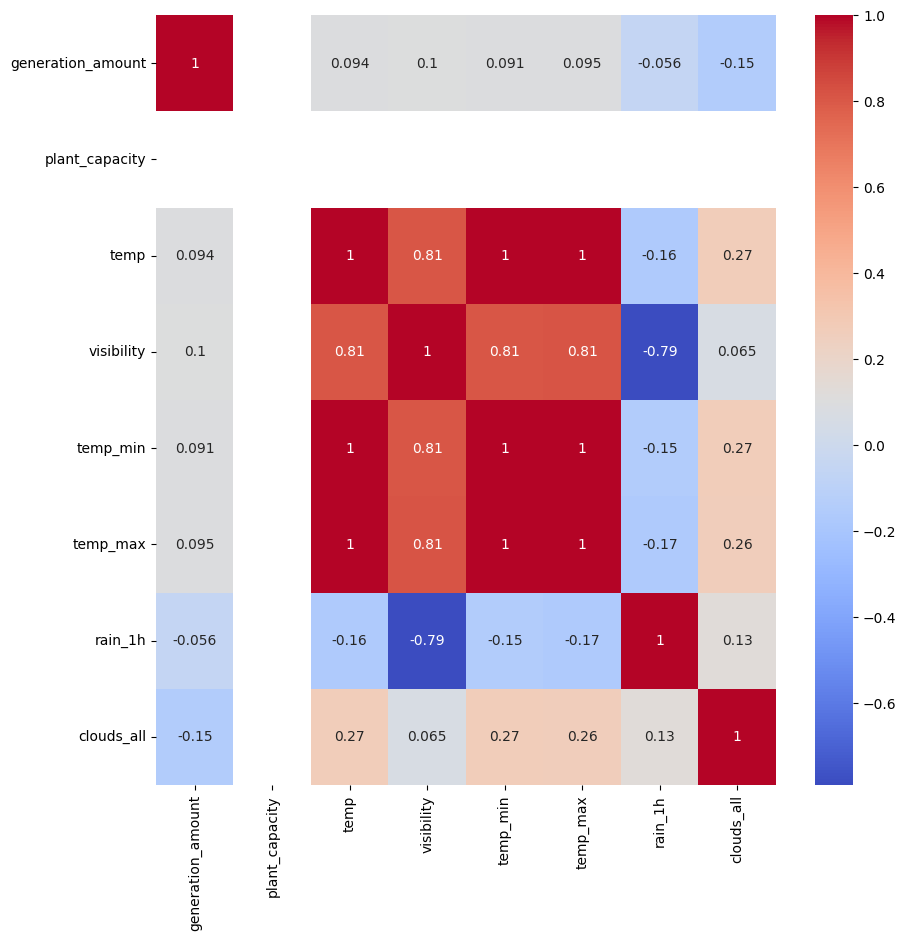

In [ ]:
plt.figure(figsize = (10, 10))

sns.heatmap(
    NAL_df.corr(),
    cmap = 'coolwarm',
    annot = True,
    annot_kws = {"size": 10}
)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
drop_cols = ['date', 'plant_name', 'generation_amount']

# Drop rows with NaN values only in the features or the target column (not across all columns)
NAL_df = NAL_df.dropna(subset=['generation_amount', 'plant_capacity', 'temp', 'temp_min', 'temp_max', 'rain_1h', 'clouds_all'])

# Prepare X and y
X = NAL_df.drop(columns=drop_cols)
y = NAL_df['generation_amount']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('regressor', LinearRegression())  # Linear Regression model
])

# Fit the pipeline on training data
pipeline.fit(X_train, y_train)

# Make predictions on test data
y_pred = pipeline.predict(X_test)

# Evaluate (optional, but useful to see performance)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)
print("Predictions:", y_pred)

ValueError: could not convert string to float: '2024-08-02 04:00:00 +0000 UTC'